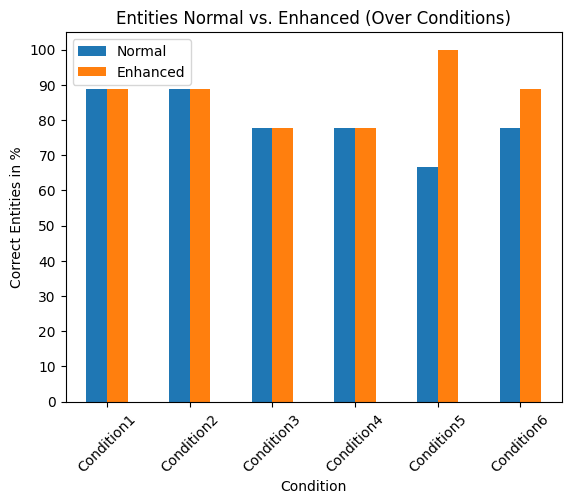

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Read data from the json
data = pd.read_json('results.json', orient='records')

# Collect sum for entities, grouped by condition
df = data.groupby('Condition').agg(
    Normal = ('Correct_Entities_Normal', 'sum'),
    Enhanced = ('Correct_Entities_Enhanced', 'sum'),
    Total = ('Ground_Truth_Entities', 'count')
)

# Get percentages
df['Normal'] = (df['Normal'] / df['Total']) * 100
df['Enhanced'] = (df['Enhanced'] / df['Total']) * 100


df[['Normal', 'Enhanced']].plot(kind='bar')
plt.title('Entities Normal vs. Enhanced (Over Conditions)')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 110, 10))
plt.ylabel('Correct Entities in %')
plt.show()

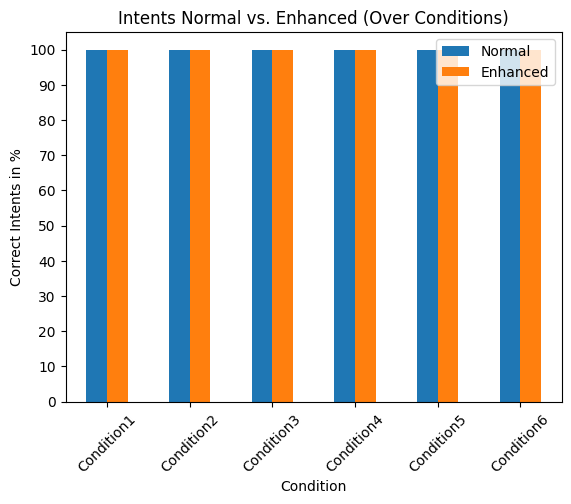

In [8]:
idf = data.groupby('Condition').agg(
    Normal = ('Correct_Intent_Normal', 'sum'),
    Enhanced = ('Correct_Intent_Enhanced', 'sum'),
    Total = ('Ground_Truth_Intent', 'count')
)

idf['Normal'] = (idf['Normal'] / idf['Total']) * 100
idf['Enhanced'] = (idf['Enhanced'] / idf['Total']) * 100

idf[['Normal', 'Enhanced']].plot(kind='bar')
plt.title("Intents Normal vs. Enhanced (Over Conditions)")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 110, 10))
plt.ylabel('Correct Intents in %')
plt.show()

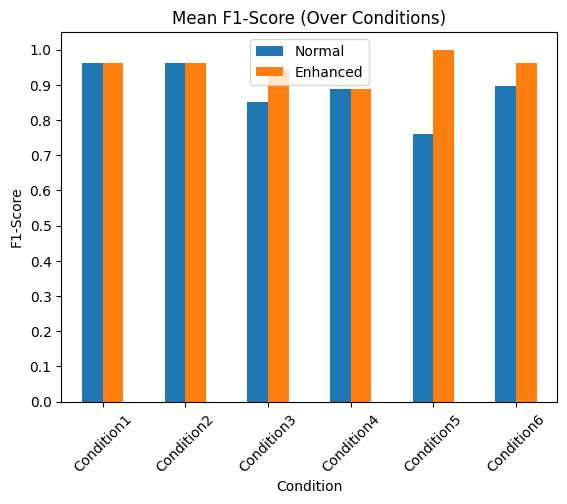

In [9]:
f1df = data.groupby('Condition').agg(
    Normal = ('F1_Normal', 'mean'),
    Enhanced = ('F1_Enhanced', 'mean'),
)

f1df.plot(kind='bar')
plt.title('Mean F1-Score (Over Conditions)')
plt.xticks(rotation=45)
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.ylabel('F1-Score')
plt.show()

                                         Normal  Enhanced  Total
Tuples                                                          
(BeneficiaryRole, Sarah, NaturalPerson)      17        18     18
(Concept, video games, Interest)             18        18     18
(Item, coffee, drink)                        17        18     18
(Item, cola, drink)                           8        11     18
(Item, fries, food)                           8        11     18
(Item, steaks, food)                          8        11     18
                                         F1_Normal  F1_Enhanced  Total
Tuples                                                                
(BeneficiaryRole, Sarah, NaturalPerson)   0.972222     1.000000     18
(Concept, video games, Interest)          1.000000     1.000000     18
(Item, coffee, drink)                     0.972222     1.000000     18
(Item, cola, drink)                       0.688889     0.859259     18
(Item, fries, food)                       0.688889    

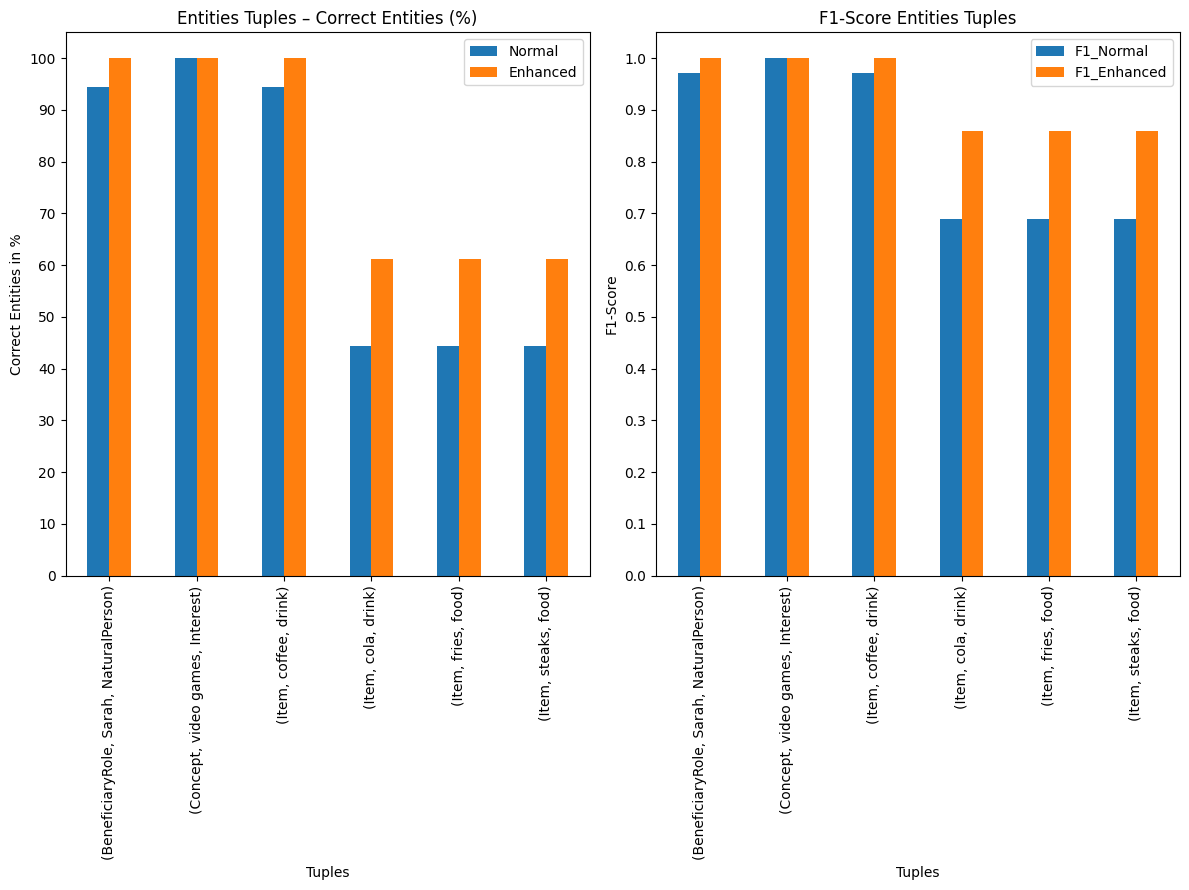

In [10]:
import matplotlib.pyplot as plt
import numpy as np

df = data.explode('Ground_Truth_Entities')

df['Tuples'] = df['Ground_Truth_Entities'].apply(
    lambda x: (x['role'], x['value'], x['entity'])
)

ent1 = df.groupby('Tuples').agg(
    Normal=('Correct_Entities_Normal', 'sum'),
    Enhanced=('Correct_Entities_Enhanced', 'sum'),
    Total=('Tuples', 'count')
)

print(ent1)

ent1['Normal'] = (ent1['Normal'] / ent1['Total']) * 100
ent1['Enhanced'] = (ent1['Enhanced'] / ent1['Total']) * 100

ent2 = df.groupby('Tuples').agg(
    F1_Normal=('F1_Normal', 'mean'),
    F1_Enhanced=('F1_Enhanced', 'mean'),
    Total=('Tuples', 'count')
)

print(ent2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 9))

# --- Plot 1 ---
ent1[['Normal', 'Enhanced']].plot(kind='bar', ax=ax1)
ax1.set_title('Entities Tuples – Correct Entities (%)')
ax1.set_ylabel('Correct Entities in %')
ax1.set_yticks(np.arange(0, 110, 10))

# --- Plot 2 ---
ent2[['F1_Normal', 'F1_Enhanced']].plot(kind='bar', ax=ax2)
ax2.set_title('F1-Score Entities Tuples')
ax2.set_ylabel('F1-Score')
ax2.set_yticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()
plt.show()


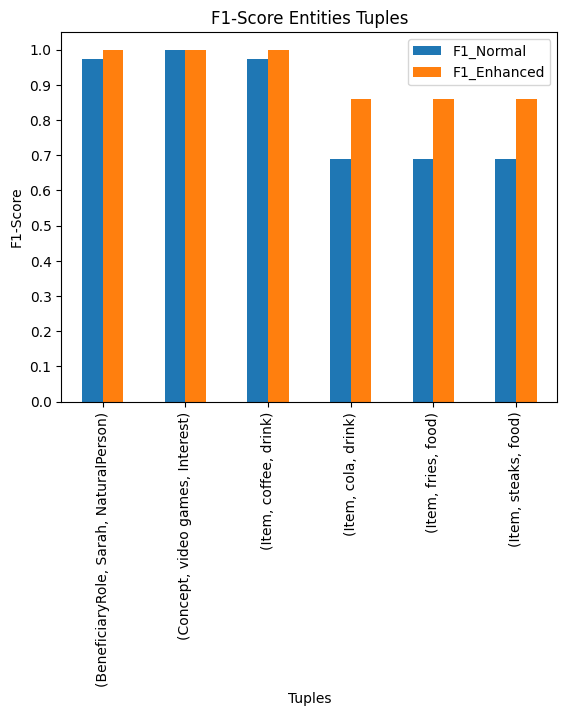

In [11]:
df = data.explode('Ground_Truth_Entities')
df['Tuples'] = df['Ground_Truth_Entities'].apply(lambda x: (x['role'], x['value'], x['entity']))

ent = df.groupby('Tuples').agg(
    # Normal = ('Correct_Entities_Normal', 'sum'),
    # Enhanced = ('Correct_Entities_Enhanced', 'sum'),
    Total = ('Tuples', 'count'),
    F1_Normal = ('F1_Normal', 'mean'),
    F1_Enhanced = ('F1_Enhanced', 'mean'),
)

ent[['F1_Normal', 'F1_Enhanced']].plot(kind='bar')
plt.title('F1-Score Entities Tuples')
plt.ylabel('F1-Score')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()